In [21]:
# Clustering Jerárquico

# Importacion de librerias
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.manifold import TSNE
import scipy.stats
from sklearn.neighbors import NearestCentroid

In [2]:
import sys
sys.path.append( '../../..' )
from utils import data_preprocesados, plot_mixture

 instala AntroPy [https://raphaelvallat.com/antropy] pip3 install antropy


In [3]:
X = data_preprocesados(2, n_components=5, include_categorical=False)
X = pd.DataFrame(X)

[0.35839694 0.2125936  0.08712974 0.06979471 0.06568434] 0.7935993420974994


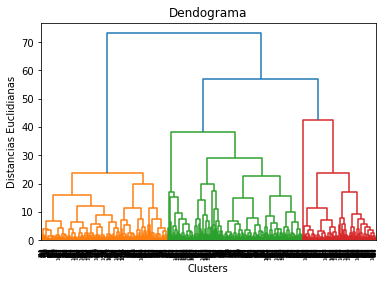

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Clusters')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [5]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

[0.35839694 0.2125936  0.08712974 0.06979471 0.06568434] 0.7935993420974995


C:\Users\Pablo\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
No handles with labels found to put in legend.


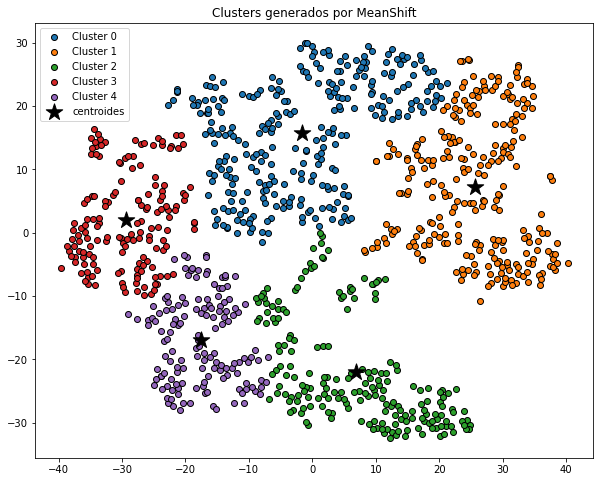

In [20]:
X_all = data_preprocesados(2, n_components=5)

tsne = TSNE(init='pca', learning_rate='auto')
X_valid_2D_3 = tsne.fit_transform(X_all)

hc_model = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

hc_model.fit(X_valid_2D_3)

y_predict = hc_model.fit_predict(X_valid_2D_3)

clf = NearestCentroid()
clf.fit(X_valid_2D_3, y_predict)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_title('Clusters generados por MeanShift')
ax.legend();

for i in np.unique(y_predict):
    ax.scatter(
        x = X_valid_2D_3[y_predict == i, 0],
        y = X_valid_2D_3[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax.scatter(
    x = clf.centroids_[:, 0],
    y = clf.centroids_[:, 1], 
    c = 'black',
    s = 300,
    marker = '*',
    label  = 'centroides'
)

ax.legend()